### First lets check out what the vgg19 saved file looks like:

In [1]:
import scipy.io
vgg = scipy.io.loadmat('../input/imagenet-vgg-verydeep-19.mat')

In [2]:
# Uncomment the next line to see the huuuuuge matrix
# print (vgg['layers']) 
# 1x43 matrix, each column is a layer

In [3]:
layers = vgg['layers'][0]

In [4]:
# Uncomment the next line to see the weights of the fifth layer
# print (layers[5][0][0][0][0][0]) 

In [5]:
# Uncomment the next line to see the baises of the fifth layer
# print (layers[5][0][0][0][0][1]) 

In [6]:
# printing all layer names
for i in range(43):
    print (i, ' : ', layers[i][0][0][-2][0])

0  :  conv1_1
1  :  relu
2  :  conv1_2
3  :  relu
4  :  max
5  :  conv2_1
6  :  relu
7  :  conv2_2
8  :  relu
9  :  max
10  :  conv3_1
11  :  relu
12  :  conv3_2
13  :  relu
14  :  conv3_3
15  :  relu
16  :  conv3_4
17  :  relu
18  :  max
19  :  conv4_1
20  :  relu
21  :  conv4_2
22  :  relu
23  :  conv4_3
24  :  relu
25  :  conv4_4
26  :  relu
27  :  max
28  :  conv5_1
29  :  relu
30  :  conv5_2
31  :  relu
32  :  conv5_3
33  :  relu
34  :  conv5_4
35  :  relu
36  :  max
37  :  fc6
38  :  relu
39  :  fc7
40  :  relu
41  :  fc8
42  :  softmax


In [7]:
# A function that returns the weights in a layer and checks if the layer name is correct
def _weights(layer, expected_layer_name):
        W = layers[layer][0][0][0][0][0]
        b = layers[layer][0][0][0][0][1]
        layer_name = layers[layer][0][0][-2][0]
        assert layer_name == expected_layer_name
        return W, b

In [8]:
# Uncomment the next line to see the weights and baises of layer 14
# _weights(14, 'conv3_3')

### Here we will make our layers from the weights given

In [9]:
# Making functions that will make layers from those weights from vgg19
import tensorflow as tf

def _conv2d_relu(prev_layer, layer, layer_name):
        W, b = _weights(layer, layer_name)
        W = tf.constant(W)
        b = tf.constant(np.reshape(b, (b.size)))
        conv = tf.nn.conv2d(prev_layer, filter=W, strides=[1, 1, 1, 1], padding='SAME') + b
        return tf.nn.relu(conv)

def _avgpool(prev_layer):
        return tf.nn.avg_pool(prev_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

### We are taking a fixed size of images for simplicity sake

In [10]:
# Making a graph
import numpy as np
IMAGE_HEIGHT = 600
IMAGE_WIDTH = 800
COLOR_CHANNELS = 3

graph = {}
graph['input']   = tf.Variable(np.zeros((1, IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS)), dtype = 'float32')
graph['conv1_1']  = _conv2d_relu(graph['input'], 0, 'conv1_1')
graph['conv1_2']  = _conv2d_relu(graph['conv1_1'], 2, 'conv1_2')
graph['avgpool1'] = _avgpool(graph['conv1_2'])
graph['conv2_1']  = _conv2d_relu(graph['avgpool1'], 5, 'conv2_1')
graph['conv2_2']  = _conv2d_relu(graph['conv2_1'], 7, 'conv2_2')
graph['avgpool2'] = _avgpool(graph['conv2_2'])
graph['conv3_1']  = _conv2d_relu(graph['avgpool2'], 10, 'conv3_1')
graph['conv3_2']  = _conv2d_relu(graph['conv3_1'], 12, 'conv3_2')
graph['conv3_3']  = _conv2d_relu(graph['conv3_2'], 14, 'conv3_3')
graph['conv3_4']  = _conv2d_relu(graph['conv3_3'], 16, 'conv3_4')
graph['avgpool3'] = _avgpool(graph['conv3_4'])
graph['conv4_1']  = _conv2d_relu(graph['avgpool3'], 19, 'conv4_1')
graph['conv4_2']  = _conv2d_relu(graph['conv4_1'], 21, 'conv4_2')
graph['conv4_3']  = _conv2d_relu(graph['conv4_2'], 23, 'conv4_3')
graph['conv4_4']  = _conv2d_relu(graph['conv4_3'], 25, 'conv4_4')
graph['avgpool4'] = _avgpool(graph['conv4_4'])
graph['conv5_1']  = _conv2d_relu(graph['avgpool4'], 28, 'conv5_1')
graph['conv5_2']  = _conv2d_relu(graph['conv5_1'], 30, 'conv5_2')
graph['conv5_3']  = _conv2d_relu(graph['conv5_2'], 32, 'conv5_3')
graph['conv5_4']  = _conv2d_relu(graph['conv5_3'], 34, 'conv5_4')
graph['avgpool5'] = _avgpool(graph['conv5_4'])

In [11]:
graph

{'avgpool1': <tf.Tensor 'AvgPool:0' shape=(1, 300, 400, 64) dtype=float32>,
 'avgpool2': <tf.Tensor 'AvgPool_1:0' shape=(1, 150, 200, 128) dtype=float32>,
 'avgpool3': <tf.Tensor 'AvgPool_2:0' shape=(1, 75, 100, 256) dtype=float32>,
 'avgpool4': <tf.Tensor 'AvgPool_3:0' shape=(1, 38, 50, 512) dtype=float32>,
 'avgpool5': <tf.Tensor 'AvgPool_4:0' shape=(1, 19, 25, 512) dtype=float32>,
 'conv1_1': <tf.Tensor 'Relu:0' shape=(1, 600, 800, 64) dtype=float32>,
 'conv1_2': <tf.Tensor 'Relu_1:0' shape=(1, 600, 800, 64) dtype=float32>,
 'conv2_1': <tf.Tensor 'Relu_2:0' shape=(1, 300, 400, 128) dtype=float32>,
 'conv2_2': <tf.Tensor 'Relu_3:0' shape=(1, 300, 400, 128) dtype=float32>,
 'conv3_1': <tf.Tensor 'Relu_4:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv3_2': <tf.Tensor 'Relu_5:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv3_3': <tf.Tensor 'Relu_6:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv3_4': <tf.Tensor 'Relu_7:0' shape=(1, 150, 200, 256) dtype=float32>,
 'conv4_1': <tf.T

### The MEAN_VALUES array was used to train vgg19, any change in those values will have a negative effect on the result

In [12]:
#Defining some helper functions

import scipy.misc
MEAN_VALUES = np.array([123.68, 116.779, 103.939]).reshape((1,1,1,3))

def generate_noise_image(content_image, noise_ratio = 0.6):
    noise_image = np.random.uniform(
            -20, 20,
            (1, IMAGE_HEIGHT, IMAGE_WIDTH, COLOR_CHANNELS)).astype('float32')
    output_image = noise_image * noise_ratio + content_image * (1 - noise_ratio)
    return output_image

def load_image(path):
    image = scipy.misc.imread(path)
    image = np.reshape(image, ((1,) + image.shape))
    image = image - MEAN_VALUES
    return image

def save_image(path, image):
    image = image + MEAN_VALUES
    image = image[0]
    image = np.clip(image, 0, 255).astype('uint8')
    scipy.misc.imsave(path, image)

In [13]:
content_image = load_image('./content.jpg')
style_image = load_image('./style.jpg')
output_image = generate_noise_image(content_image)

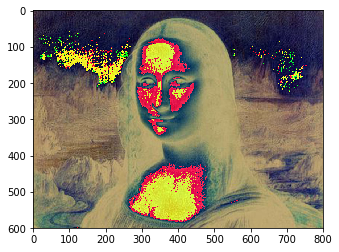

In [14]:
from matplotlib.pyplot import imshow
%matplotlib inline
imshow(content_image[0])

# The image looks weird because the mean value has been subtracted form it

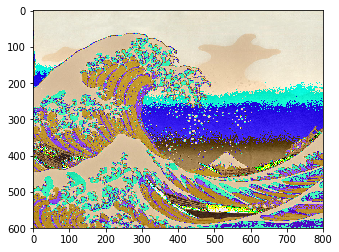

In [15]:
imshow(style_image[0])

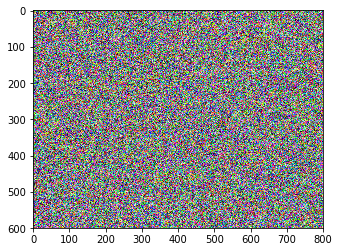

In [16]:
imshow(output_image[0])
# The output image will be noise in the start which will be modified to the combination of content and style

### Defining the content loss

We are considering only layer-21 for content loss

In [17]:
# Define content loss function
def content_loss_func(sess, model):
        x = sess.run(model['conv4_2'])
        p = model['conv4_2']     
        return tf.reduce_sum(tf.pow(x - p, 2))

### Defining the style loss

We are considering layers 0, 5, 10, 19, 28 for style losses

In [18]:
# Define style loss function

# Each layer has a style weight that defines how much value to give to each layer's style
STYLE_LAYERS = [
    ('conv1_1', 0.5),
    ('conv2_1', 1.0),
    ('conv3_1', 1.5),
    ('conv4_1', 3.0),
    ('conv5_1', 4.0),
]

def style_loss_func(sess, model):
    def _gram_matrix(F, N, M):
        Ft = tf.reshape(F, (M, N))
        return tf.matmul(tf.transpose(Ft), Ft)

    def _style_loss(a, x):
        # N is the number of filters (at layer l).
        N = a.shape[3]
        # M is the height times the width of the feature map (at layer l).
        M = a.shape[1] * a.shape[2]
        # A is the style representation of the original image (at layer l).
        A = _gram_matrix(a, N, M)
        # G is the style representation of the generated image (at layer l).
        G = _gram_matrix(x, N, M)
        return tf.reduce_sum(tf.pow(G - A, 2))

    E = [_style_loss(sess.run(model[layer_name]), model[layer_name]) for layer_name, _ in STYLE_LAYERS]
    W = [w for _, w in STYLE_LAYERS]
    loss = sum([W[l] * E[l] for l in range(len(STYLE_LAYERS))])
    return loss

### Initialize the tensorflow session

In [19]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

Send content image to the graph and initialize the content loss

Send style image to the graph and initialize the style loss

In [20]:
sess.run(graph['input'].assign(content_image))
content_loss = content_loss_func(sess, graph)

sess.run(graph['input'].assign(style_image))
style_loss = style_loss_func(sess, graph)

total_loss = 5 * content_loss + 100 * style_loss # Adding content and style losses with more preference to style loss

### Using Adam optimizer and defining the training step

In [21]:
optimizer = tf.train.AdamOptimizer(2.0)
train_step = optimizer.minimize(total_loss)

### Careful with the number of iterations, on the time of this writing, 1000 iterations take 15 mins to run

In [22]:
import os
from tqdm import tqdm
ITERATIONS = 1000
sess.run(tf.global_variables_initializer())
sess.run(graph['input'].assign(output_image))
for it in tqdm(range(ITERATIONS)):
    sess.run(train_step)
    if it%10 == 0:
        image_to_save = sess.run(graph['input'])
        if not os.path.exists('output'):
            os.mkdir('output')
        filename = 'output/%d.jpg' % (it)
        save_image(filename, image_to_save)
sess.close()

100%|██████████| 1000/1000 [14:40<00:00,  1.14it/s]
